<a href="https://colab.research.google.com/github/sathvikpatel0812/DAUP-2025/blob/main/2303A52L05_DAUP_LAB_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
from scipy.stats import binom

In [8]:
# Question 1: Binomial Probability in Insurance Claims

# (a) Probability that at least 4 out of 10 are smokers (p = 0.3, n = 10)
n = 10
p = 0.3
x = 4

In [9]:

# Using Binomial formula
prob_at_least_4 = sum(binom.pmf(k, n, p) for k in range(x, n + 1))
print(f"Probability that at least 4 out of 10 are smokers: {prob_at_least_4:.4f}")


Probability that at least 4 out of 10 are smokers: 0.3504


In [10]:
# Using pbinom (CDF complement)
p_at_least_4 = 1 - binom.cdf(x - 1, n, p)
print(f"(Using CDF) Probability that at least 4 out of 10 are smokers: {p_at_least_4:.4f}")


(Using CDF) Probability that at least 4 out of 10 are smokers: 0.3504


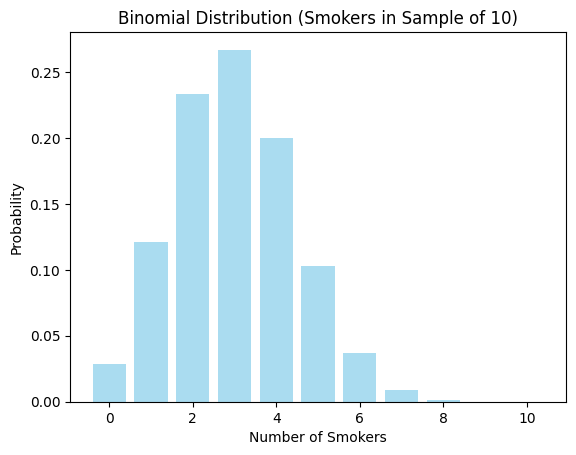

In [11]:
# (b) Plot Binomial Distribution
x_vals = np.arange(0, n + 1)
y_vals = binom.pmf(x_vals, n, p)
plt.bar(x_vals, y_vals, color='skyblue', alpha=0.7)
plt.xlabel("Number of Smokers")
plt.ylabel("Probability")
plt.title("Binomial Distribution (Smokers in Sample of 10)")

plt.show()

# Question 2: Risk Estimation Using Binomial Distribution


In [12]:
# (a) Probability that exactly 5 out of 15 have medical expenses > $20,000 (p = 0.2, n = 15)
n = 15
p = 0.2
x = 5
prob_exactly_5 = binom.pmf(x, n, p)
print(f"Probability that exactly 5 have expenses > $20,000: {prob_exactly_5:.4f}")


Probability that exactly 5 have expenses > $20,000: 0.1032


In [13]:
# (b) Cumulative probability that at most 5 have expenses > $20,000
prob_at_most_5 = binom.cdf(x, n, p)
print(f"Cumulative probability that at most 5 have expenses > $20,000: {prob_at_most_5:.4f}")


Cumulative probability that at most 5 have expenses > $20,000: 0.9389


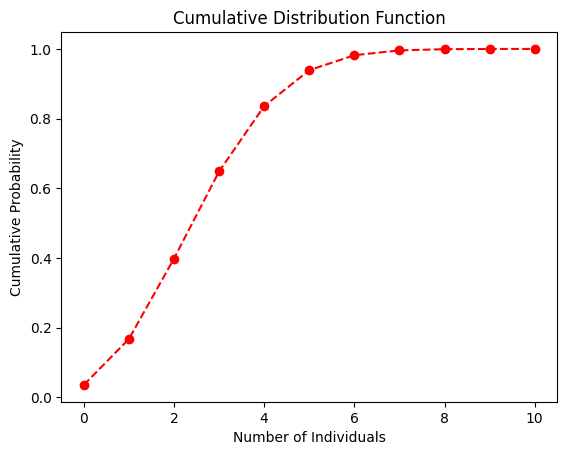

In [14]:
# (c) Plot CDF
plt.plot(x_vals, binom.cdf(x_vals, n, p), marker='o', linestyle='--', color='red')
plt.xlabel("Number of Individuals")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function")
plt.show()


# Question 3: Estimating Regional Smoking Rates Using Binomial Approximation


In [15]:
regions = {"Southwest": 0.25, "Southeast": 0.30, "Northwest": 0.20, "Northeast": 0.35}
n = 50
simulated_data = {region: np.random.binomial(n, p, 1000) for region, p in regions.items()}


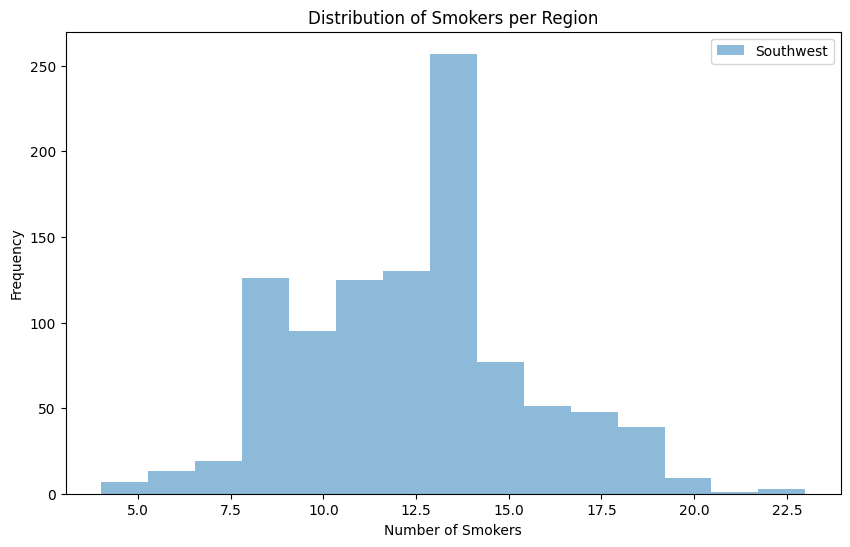

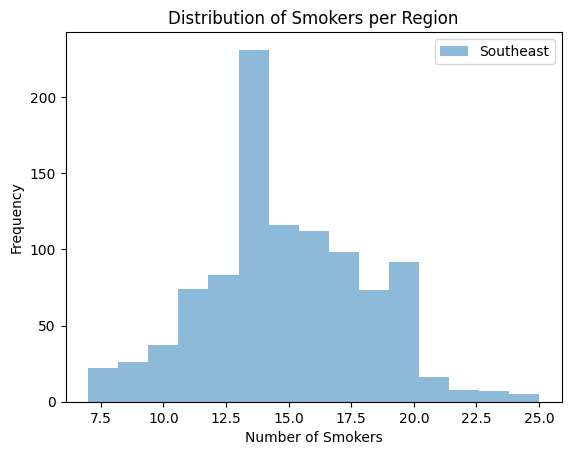

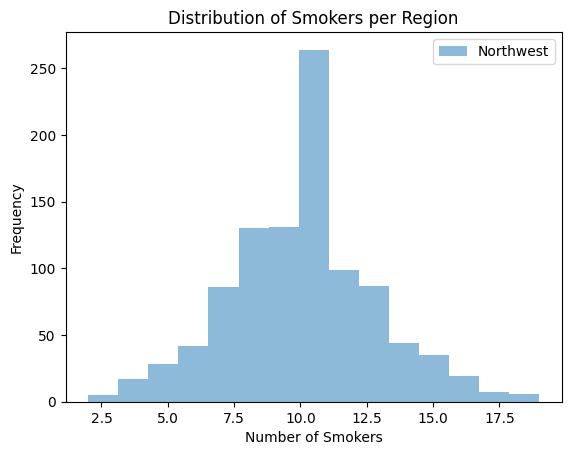

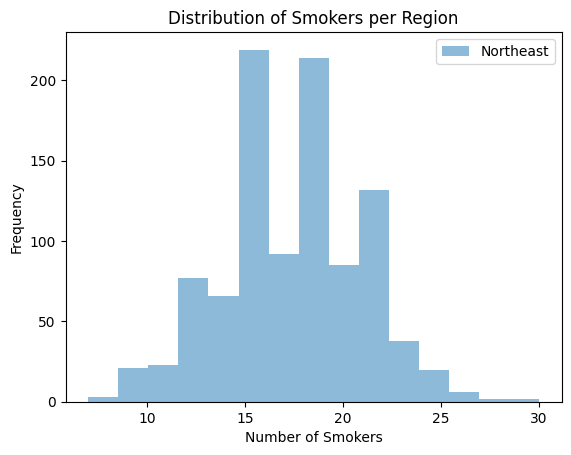

In [16]:
# (b) Visualization of smokers per region
plt.figure(figsize=(10, 6))
for region, values in simulated_data.items():
    plt.hist(values, bins=15, alpha=0.5, label=region)
    plt.xlabel("Number of Smokers")
    plt.ylabel("Frequency")
    plt.title("Distribution of Smokers per Region")
    plt.legend()
    plt.show()

In [17]:
# (c) Expected number of smokers per region
expected_smokers = {region: n * p for region, p in regions.items()}
for region, expected in expected_smokers.items():
    print(f"Expected smokers in {region}: {expected}")


Expected smokers in Southwest: 12.5
Expected smokers in Southeast: 15.0
Expected smokers in Northwest: 10.0
Expected smokers in Northeast: 17.5


<ipython-input-18-01025839bc6c>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(simulated_data.values(), labels=simulated_data.keys())


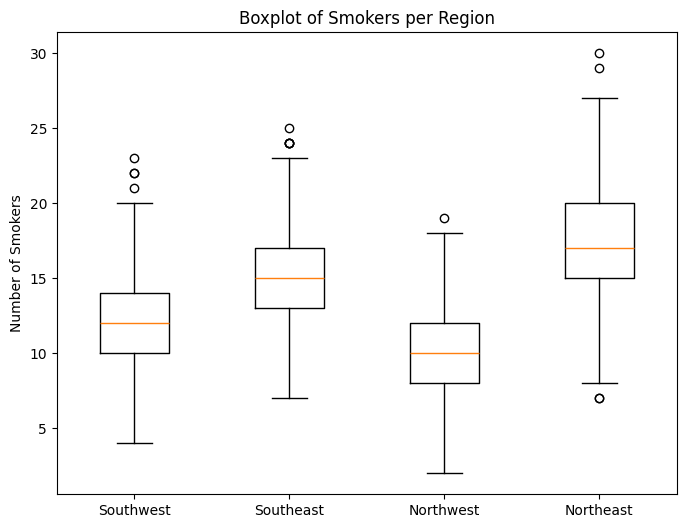

In [18]:
# Boxplot visualization for regional smoker distributions
plt.figure(figsize=(8, 6))
plt.boxplot(simulated_data.values(), labels=simulated_data.keys())
plt.ylabel("Number of Smokers")
plt.title("Boxplot of Smokers per Region")
plt.show()

# Question 4: Inverse Probability & Quantile Function for Insurance Risks


In [19]:
# (a) Find threshold for top 10% expensive claims
threshold = binom.ppf(0.9, n, p)
print(f"Threshold above which an individual is high-risk: {threshold}")


Threshold above which an individual is high-risk: 14.0


In [20]:
# (b) Probability of selecting 8 high-risk individuals in a sample of 30
prob_8_high_risk = binom.pmf(8, 30, 0.1)
print(f"Probability of selecting exactly 8 high-risk individuals: {prob_8_high_risk:.4f}")


Probability of selecting exactly 8 high-risk individuals: 0.0058


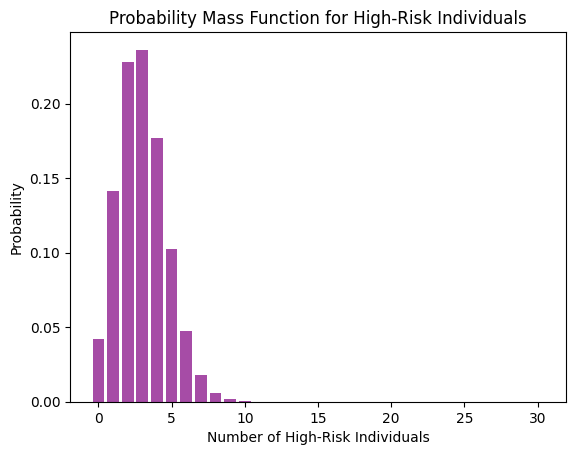

In [21]:

# (c) Plot PMF for this scenario
x_vals = np.arange(0, 30 + 1)
y_vals = binom.pmf(x_vals, 30, 0.1)
plt.bar(x_vals, y_vals, color='purple', alpha=0.7)
plt.xlabel("Number of High-Risk Individuals")
plt.ylabel("Probability")
plt.title("Probability Mass Function for High-Risk Individuals")
plt.show()


# Question 5: Modeling Probability of Having More than 3 Children


In [22]:
# (a) Probability that at least 5 out of 12 have > 3 children
n = 12
p = 0.4
x = 5
prob_at_least_5 = 1 - binom.cdf(x - 1, n, p)
print(f"Probability that at least 5 have more than 3 children: {prob_at_least_5:.4f}")


Probability that at least 5 have more than 3 children: 0.5618


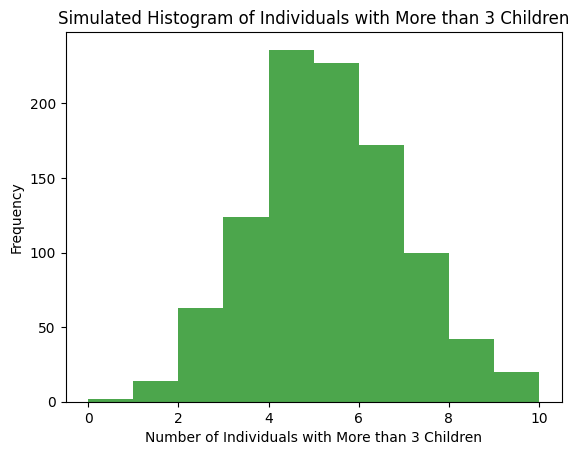

In [23]:
# (b) Simulate 1000 random samples
simulated_children = np.random.binomial(n, p, 1000)
plt.hist(simulated_children, bins=10, alpha=0.7, color='green')
plt.xlabel("Number of Individuals with More than 3 Children")
plt.ylabel("Frequency")
plt.title("Simulated Histogram of Individuals with More than 3 Children")
plt.show()

In [24]:
# (c) Compare mean and variance with theoretical values
theoretical_mean = n * p
theoretical_variance = n * p * (1 - p)
simulated_mean = np.mean(simulated_children)
simulated_variance = np.var(simulated_children)

print(f"Theoretical Mean: {theoretical_mean}, Simulated Mean: {simulated_mean:.4f}")
print(f"Theoretical Variance: {theoretical_variance}, Simulated Variance: {simulated_variance:.4f}")


Theoretical Mean: 4.800000000000001, Simulated Mean: 4.8410
Theoretical Variance: 2.8800000000000003, Simulated Variance: 2.8357
